In [16]:
import numpy as np
import tensorflow
from PIL import Image
from keras.optimizer_v2.adam import Adam
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, LeakyReLU, BatchNormalization
from keras.layers import Input, Flatten, Embedding, multiply, Dropout , Concatenate

from keras import initializers
import keras
from keras import layers

# Load Data

In [17]:
# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# show data for test

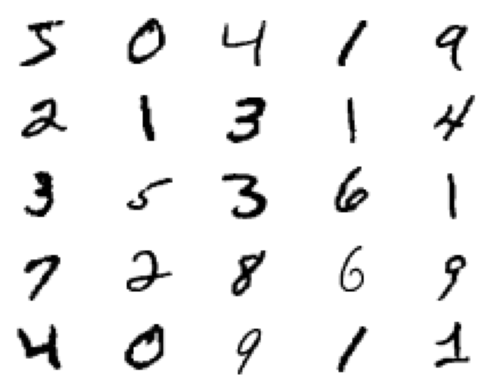

In [18]:
for i in range(25):
    # define subplot
    plt.subplot(5, 5, 1 + i)  # turn off axis
    plt.axis('off')  # plot raw pixel data
    plt.imshow(X_train[i], cmap='gray_r')

# Preprocessing Data

In [19]:
print('X_train.shape', X_train.shape)
print('y_train.shape', y_train.shape)

# reshaping the inputs
X_train = X_train.reshape(60000, 28*28)

# normalizing the inputs (-1, 1)
X_train = (X_train.astype('float32') / 255 - 0.5) * 2

print('X_train reshape:', X_train.shape)

X_train.shape (60000, 28, 28)
y_train.shape (60000,)
X_train reshape: (60000, 784)




# Generator

In [20]:
# latent space dimension
latent_dim = 64

# imagem dimension 28x28
img_dim = 784

init = initializers.RandomNormal(stddev=0.02)

# Generator network
generator = Sequential()

# Input layer and hidden layer 1
generator.add(Dense(128, input_shape=(latent_dim,), kernel_initializer=init , activation='relu'))
generator.add(BatchNormalization())

# Hidden layer 2
generator.add(Dense(256,activation='relu'))
generator.add(BatchNormalization())

# Hidden layer 3
generator.add(Dense(512,activation='relu'))
generator.add(BatchNormalization(momentum=0.5))


# Output layer 
generator.add(Dense(img_dim, activation='tanh'))

#### Generator model visualization

In [21]:
# prints a summary representation of your model
generator.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               8320      
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 256)               33024     
                                                                 
 batch_normalization_4 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_10 (Dense)            (None, 512)               131584    
                                                                 
 batch_normalization_5 (Batc  (None, 512)             

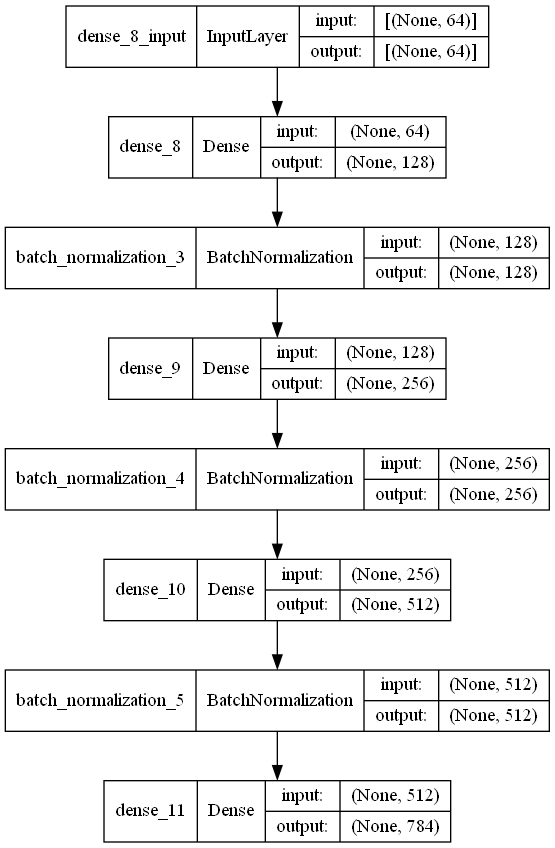

In [22]:
tensorflow.keras.utils.plot_model(generator, show_shapes=True)

#### Conditional G model
The prior input noise $p_z(z)$, and $y$ are combined in joint hidden representation.

In [7]:
# Embedding condition in input layer
num_classes = 10

# Create label embeddings
label = Input(shape=(1,), dtype='int32')
label_embedding = Embedding(num_classes, latent_dim)(label)
label_embedding = Flatten()(label_embedding)

# latent space
z = Input(shape=(latent_dim,))

# Merge inputs (z x label)
input_generator = multiply([z, label_embedding])

# Output image
img = generator(input_generator)

# Generator with condition input
generator = Model([z, label], img)

#### Conditional model visualization

In [8]:
# prints a summary representation of your model
generator.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 64)        640         ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, 64)]         0           []                               
                                                                                                  
 flatten (Flatten)              (None, 64)           0           ['embedding[0][0]']              
                                                                                              

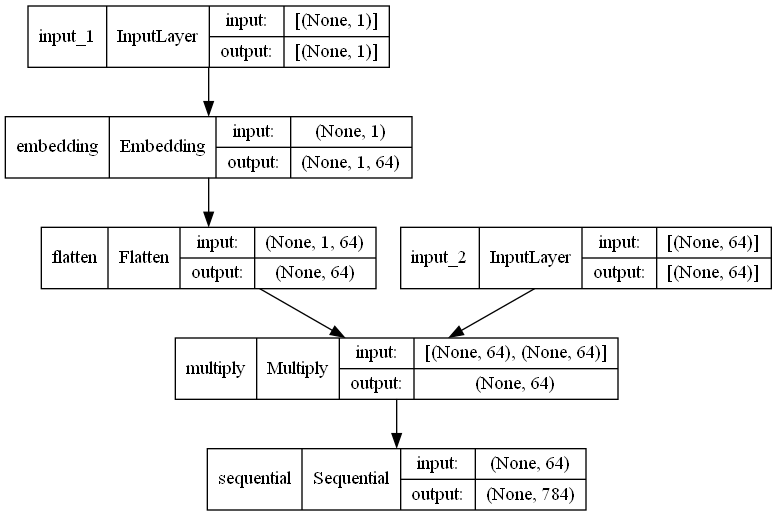

In [15]:
tensorflow.keras.utils.plot_model(generator, show_shapes=True)

#### Discriminator

In [28]:
# Discriminator network
discriminator = Sequential()

# Input layer and hidden layer 1
discriminator.add(Dense(128, input_shape=(img_dim,), kernel_initializer=init))
discriminator.add(LeakyReLU(alpha=0.2))

# Hidden layer 2
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(alpha=0.2))

# Hidden layer 3
discriminator.add(Dense(512))
discriminator.add(LeakyReLU(alpha=0.2))

# Output layer
discriminator.add(Dense(1, activation='sigmoid'))

#### Discriminator model visualization

In [10]:
# prints a summary representation of your model
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               131584    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                

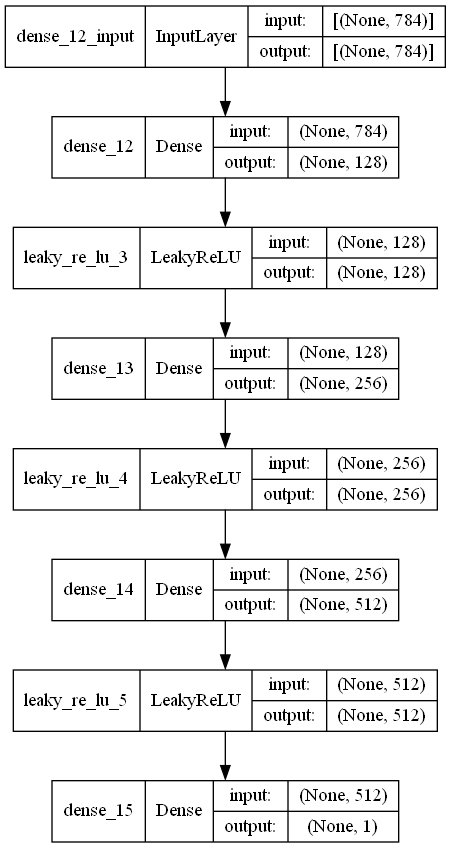

In [29]:
tensorflow.keras.utils.plot_model(discriminator, show_shapes=True)

#### Conditional D model

$x$ and $y$ are presented as inputs

In [11]:
# Embedding condition in input layer

# Create label embeddings
label_d = Input(shape=(1,), dtype='int32')
label_embedding_d = Embedding(num_classes, img_dim)(label_d)
label_embedding_d = Flatten()(label_embedding_d)

# imagem dimension 28x28
img_d = Input(shape=(img_dim,))

# Merge inputs (img x label)
input_discriminator = multiply([img_d, label_embedding_d])

# Output image
validity = discriminator(input_discriminator)

# Discriminator with condition input
discriminator = Model([img_d, label_d], validity)

#### Conditional model visualization

In [12]:
# prints a summary representation of your model
discriminator.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 784)       7840        ['input_3[0][0]']                
                                                                                                  
 input_4 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 flatten_1 (Flatten)            (None, 784)          0           ['embedding_1[0][0]']            
                                                                                            

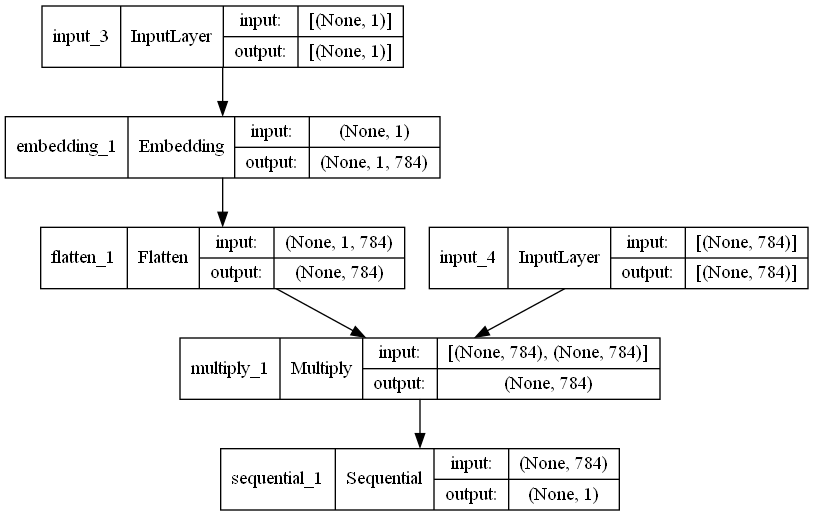

In [23]:
tensorflow.keras.utils.plot_model(discriminator, show_shapes=True)

#### Compile discriminator

In [24]:
# Optimizer
optimizer = Adam(lr=0.0002, beta_1=0.5)

discriminator.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])



c:\users\kashani\appdata\local\programs\python\python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


#### Combined network

In [25]:
discriminator.trainable = False

validity = discriminator([generator([z, label]), label])

d_g = Model([z, label], validity)

d_g.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

In [26]:
# prints a summary representation of your model
d_g.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64)]         0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 sequential_2 (Sequential)      (None, 784)          578704      ['input_2[0][0]',                
                                                                  'input_1[0][0]']                
                                                                                                  
 model_1 (Functional)           (None, 1)            273441      ['sequential_2[0][0]',     

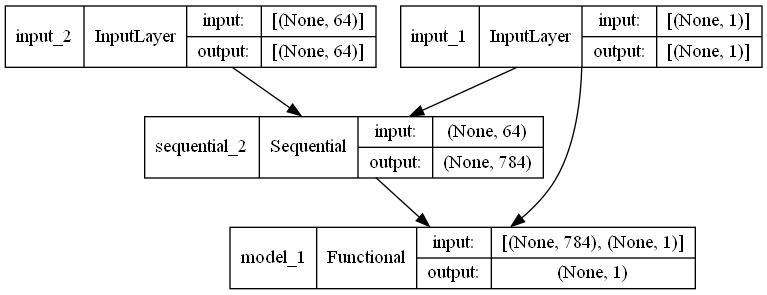

In [27]:
tensorflow.keras.utils.plot_model(d_g, show_shapes=True)

# Train model


epoch = 1/50, d_loss=0.651, g_loss=0.862                                                                                                                        


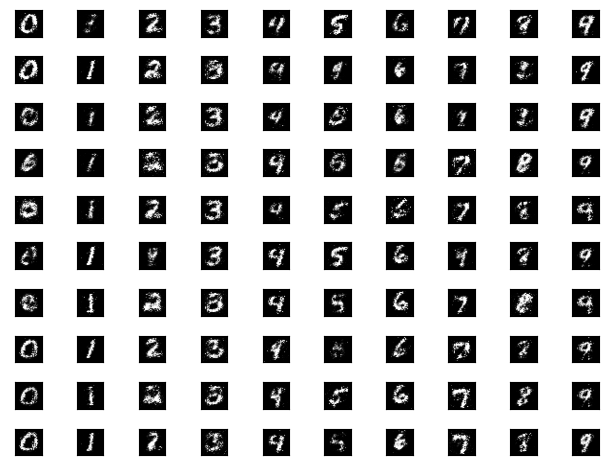

epoch = 2/50, d_loss=0.627, g_loss=0.710                                                                                                                        


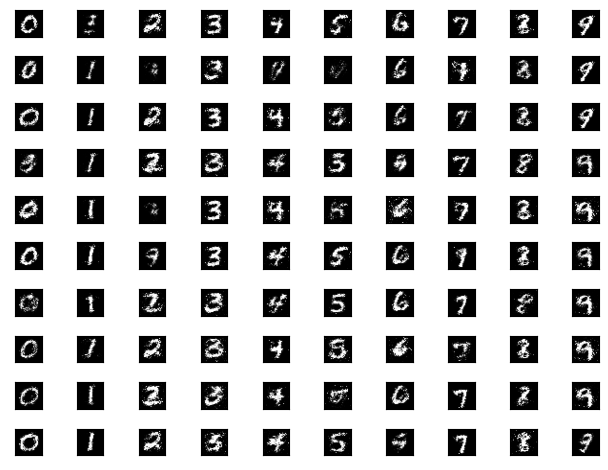

epoch = 3/50, d_loss=0.719, g_loss=0.828                                                                                                                        


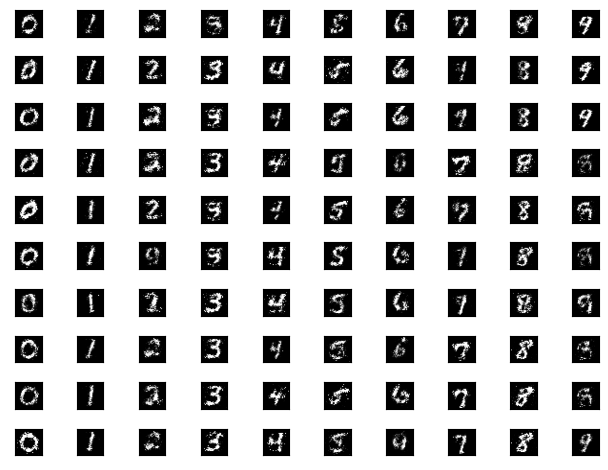

epoch = 4/50, d_loss=0.642, g_loss=0.746                                                                                                                        


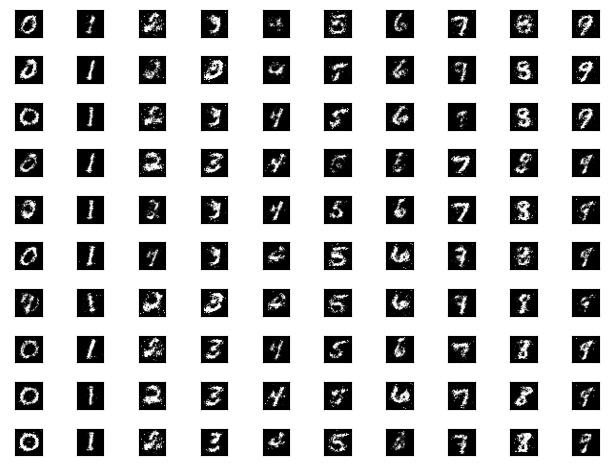

epoch = 5/50, d_loss=0.679, g_loss=0.804                                                                                                                        


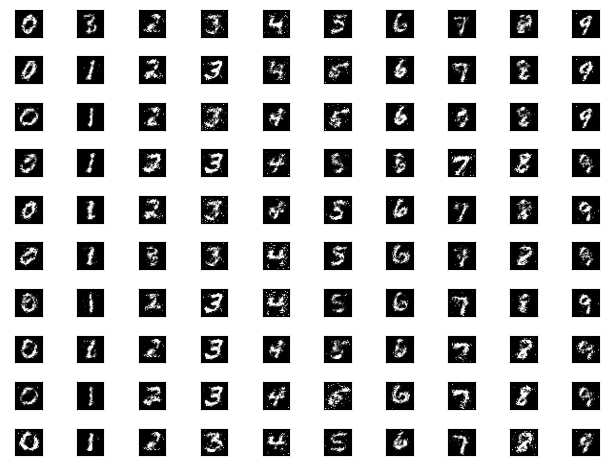

epoch = 6/50, d_loss=0.647, g_loss=0.772                                                                                                                        


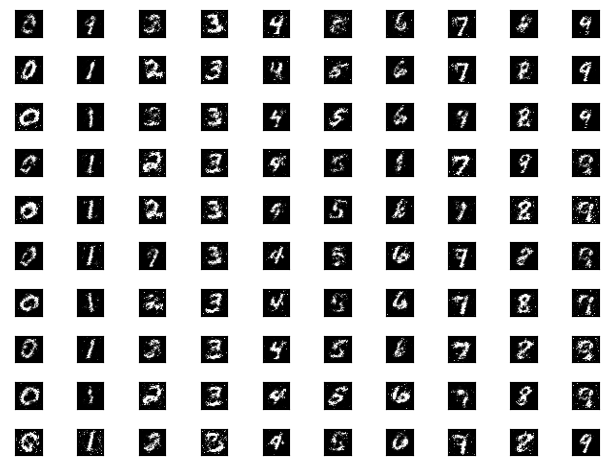

epoch = 7/50, d_loss=0.616, g_loss=0.776                                                                                                                        


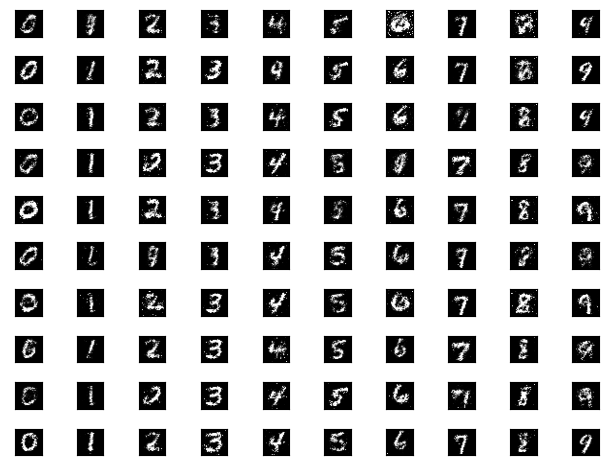

epoch = 8/50, d_loss=0.670, g_loss=0.821                                                                                                                        


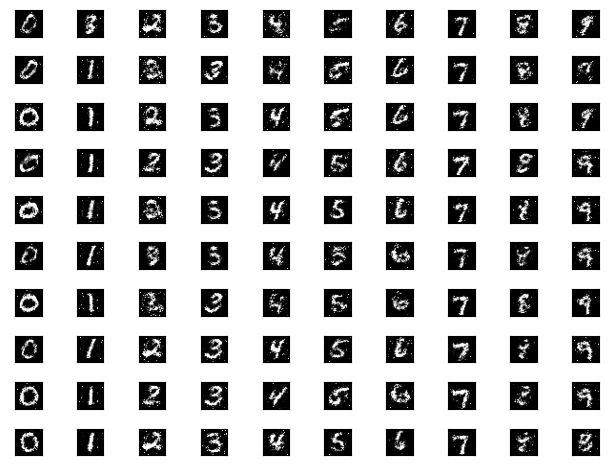

epoch = 9/50, d_loss=0.664, g_loss=0.953                                                                                                                        


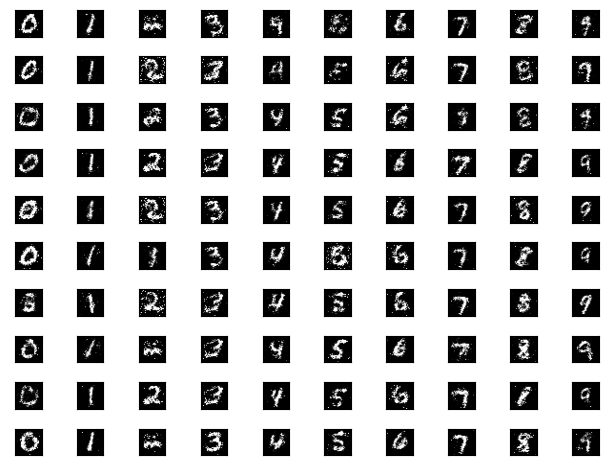

epoch = 10/50, d_loss=0.608, g_loss=0.848                                                                                                                        


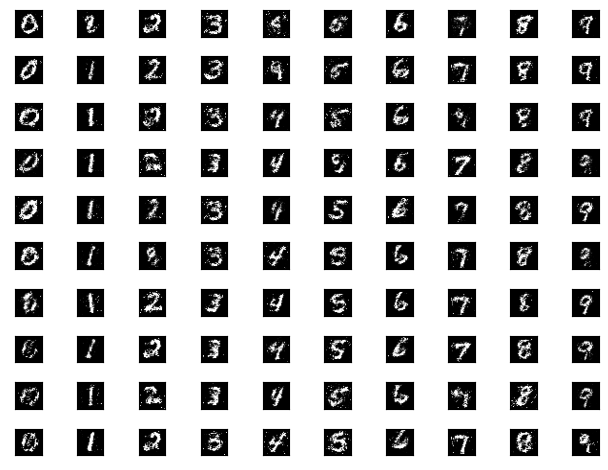

epoch = 11/50, d_loss=0.547, g_loss=0.849                                                                                                                        


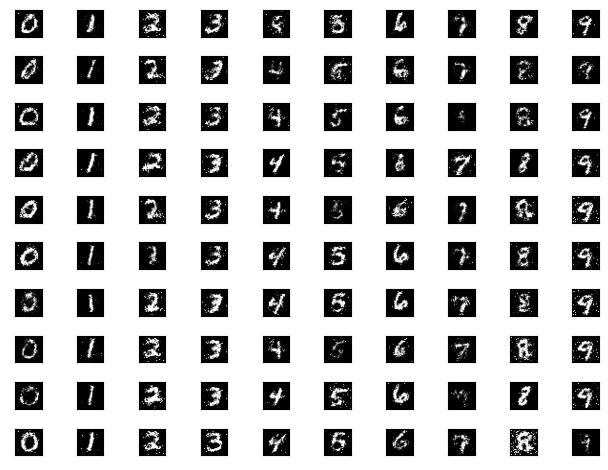

epoch = 12/50, d_loss=0.672, g_loss=0.946                                                                                                                        


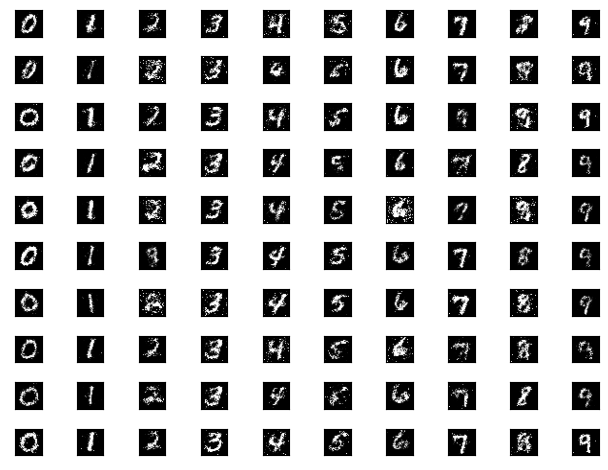

epoch = 13/50, d_loss=0.644, g_loss=0.901                                                                                                                        


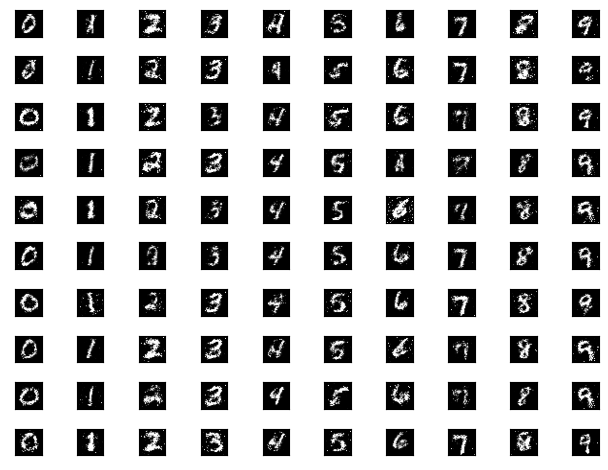

epoch = 14/50, d_loss=0.606, g_loss=0.868                                                                                                                        


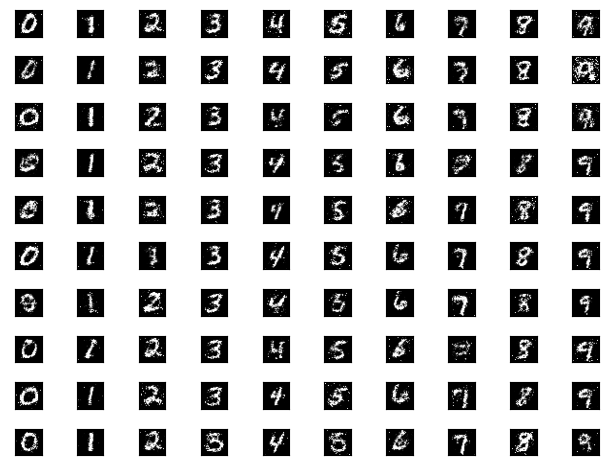

epoch = 15/50, d_loss=0.608, g_loss=0.869                                                                                                                        


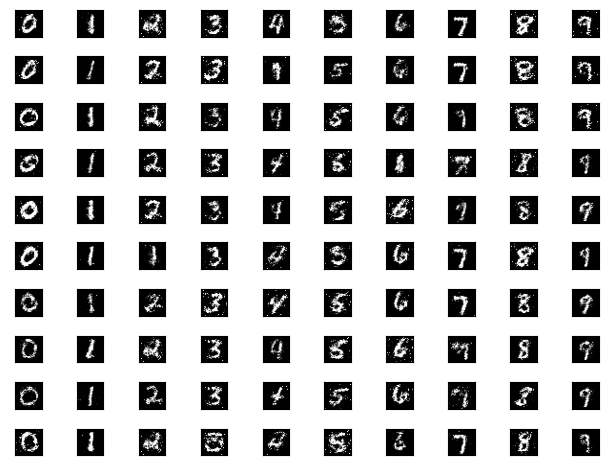

epoch = 16/50, d_loss=0.640, g_loss=0.923                                                                                                                        


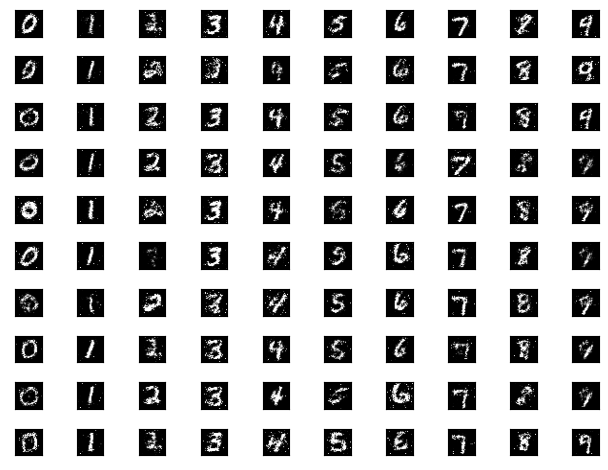

epoch = 17/50, d_loss=0.652, g_loss=0.989                                                                                                                        


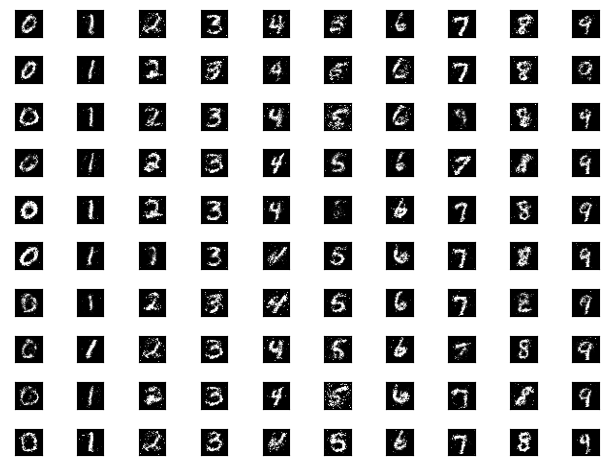

epoch = 18/50, d_loss=0.603, g_loss=0.923                                                                                                                        


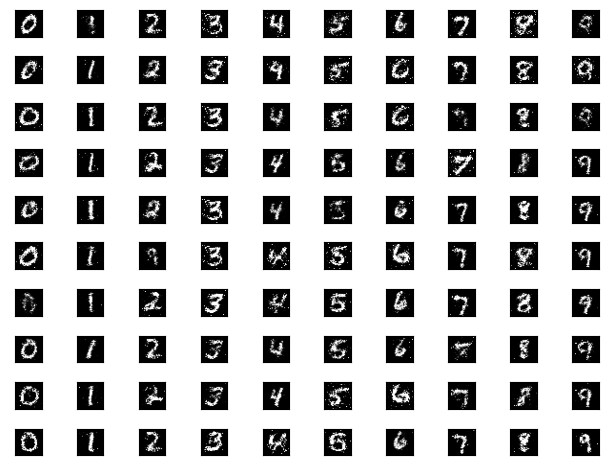

epoch = 19/50, d_loss=0.570, g_loss=0.830                                                                                                                        


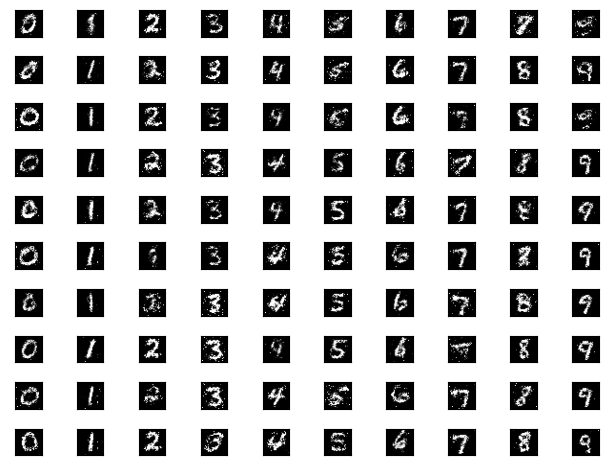

epoch = 20/50, d_loss=0.575, g_loss=0.938                                                                                                                        


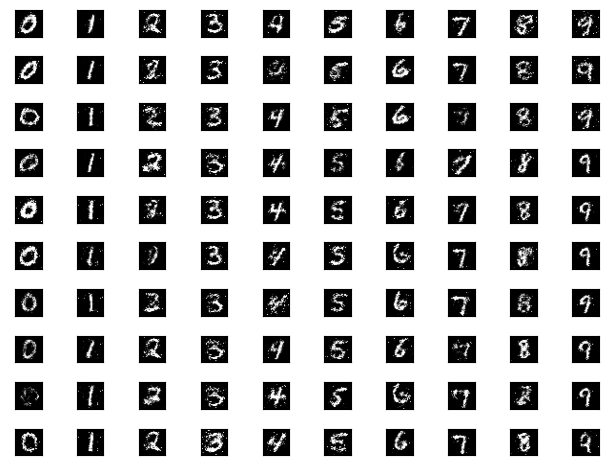

epoch = 21/50, d_loss=0.632, g_loss=0.943                                                                                                                        


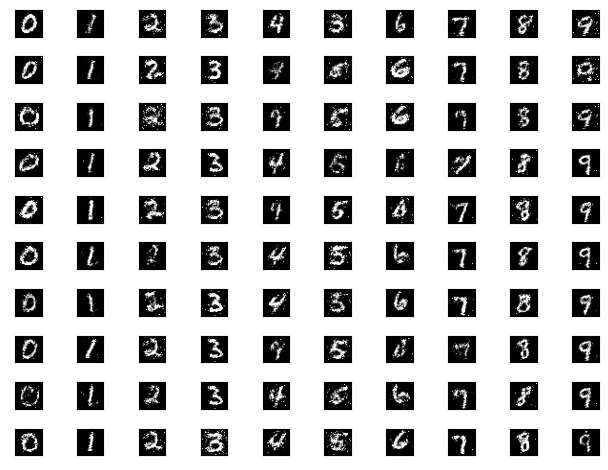

epoch = 22/50, d_loss=0.688, g_loss=0.950                                                                                                                        


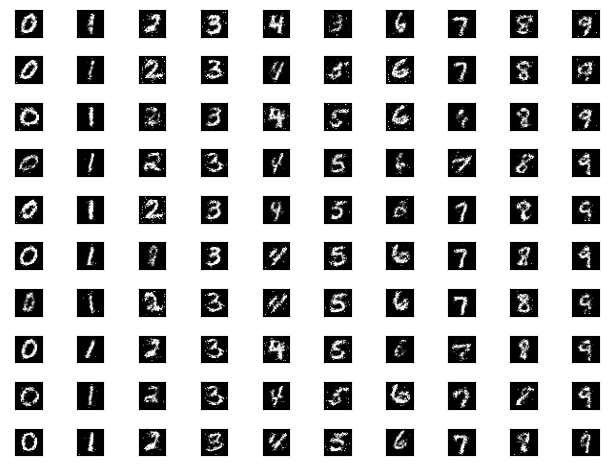

epoch = 23/50, d_loss=0.573, g_loss=0.938                                                                                                                        


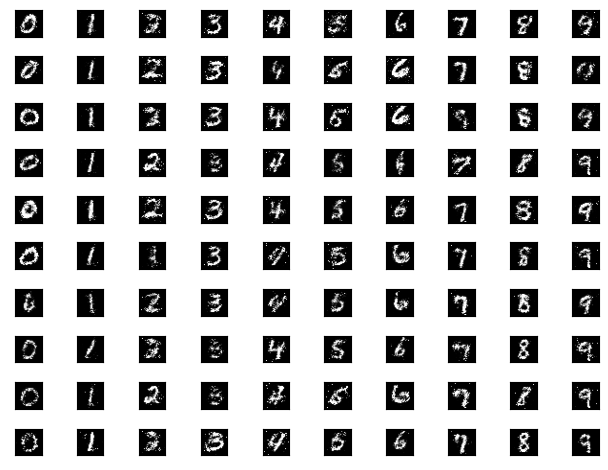

epoch = 24/50, d_loss=0.650, g_loss=0.874                                                                                                                        


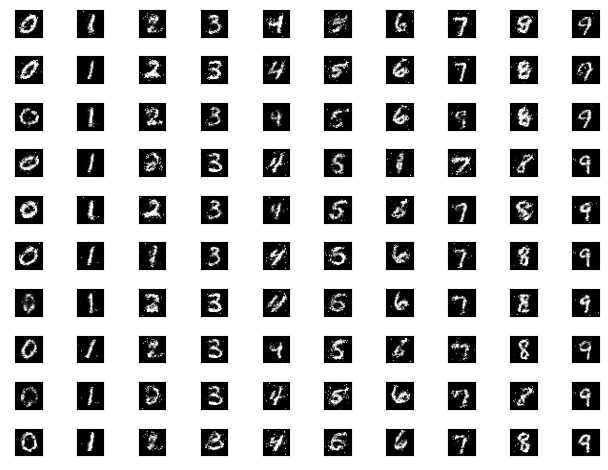

epoch = 25/50, d_loss=0.620, g_loss=0.890                                                                                                                        


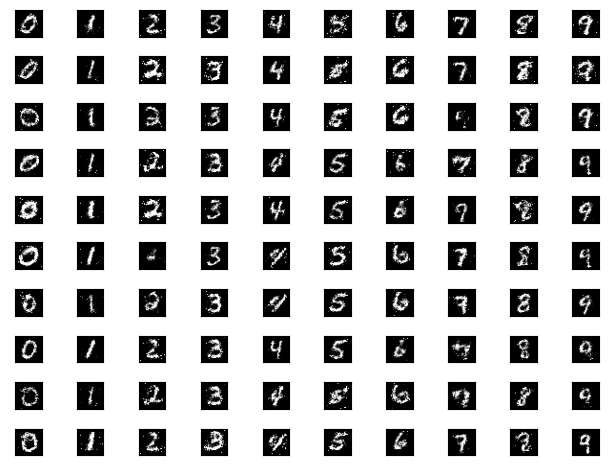

epoch = 26/50, d_loss=0.623, g_loss=1.103                                                                                                                        


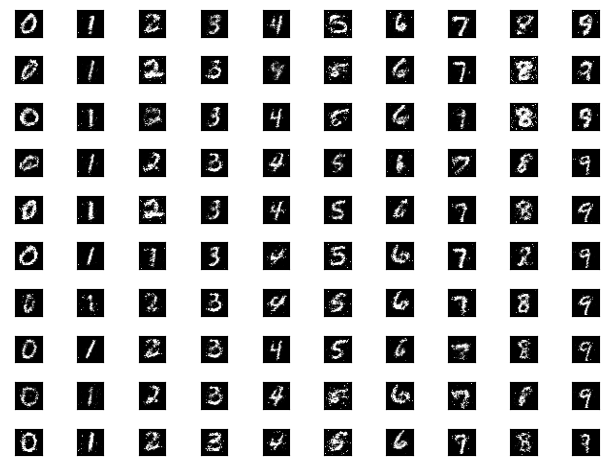

epoch = 27/50, d_loss=0.557, g_loss=0.896                                                                                                                        


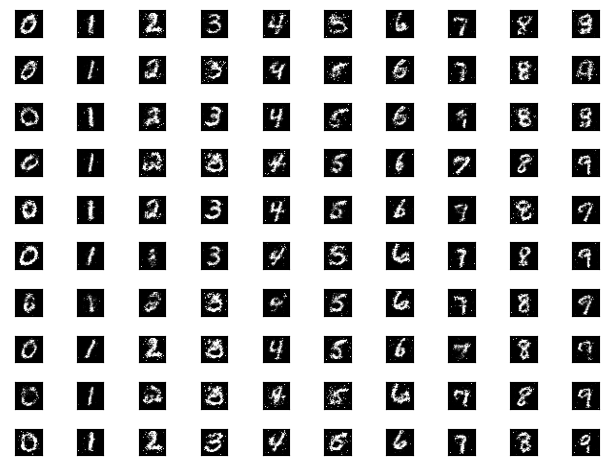

epoch = 28/50, d_loss=0.615, g_loss=0.820                                                                                                                        


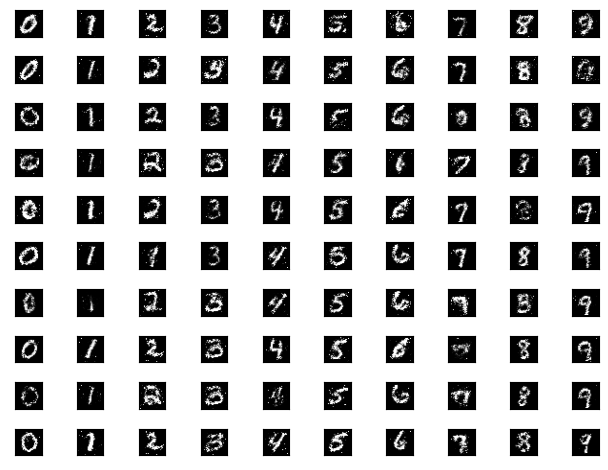

epoch = 29/50, d_loss=0.678, g_loss=0.880                                                                                                                        


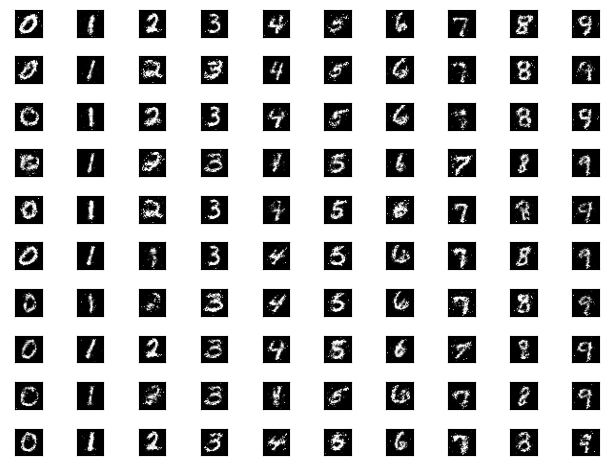

epoch = 30/50, d_loss=0.624, g_loss=0.895                                                                                                                        


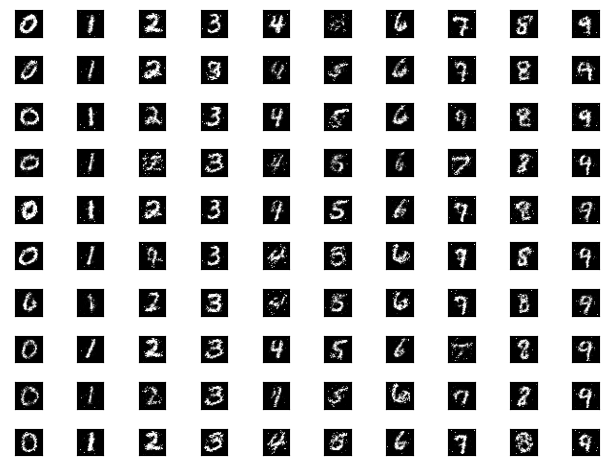

epoch = 31/50, d_loss=0.619, g_loss=0.831                                                                                                                        


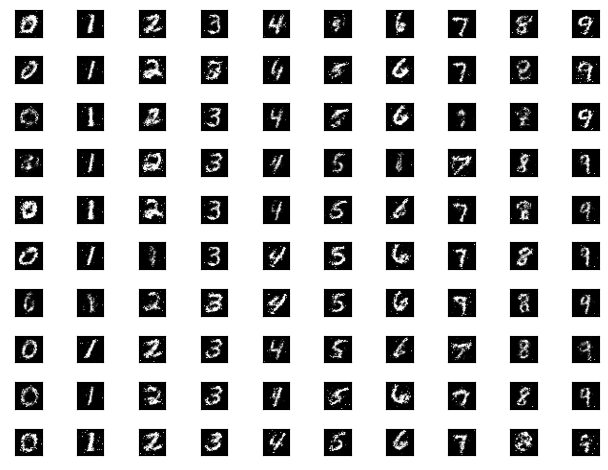

epoch = 32/50, d_loss=0.609, g_loss=0.843                                                                                                                        


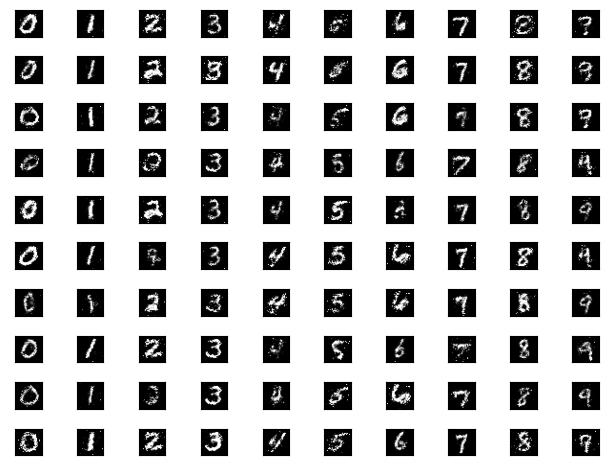

epoch = 33/50, d_loss=0.647, g_loss=0.860                                                                                                                        


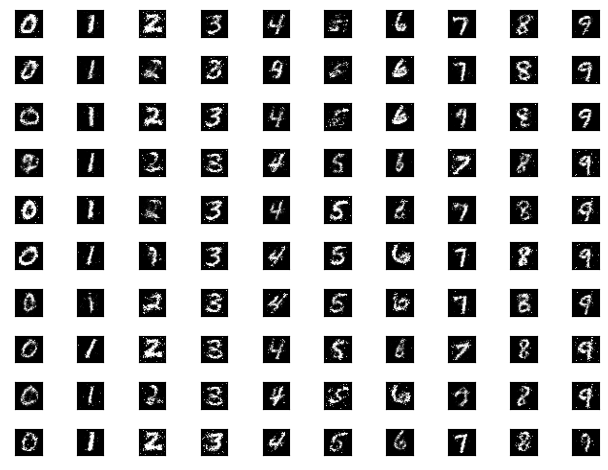

epoch = 34/50, d_loss=0.582, g_loss=0.902                                                                                                                        


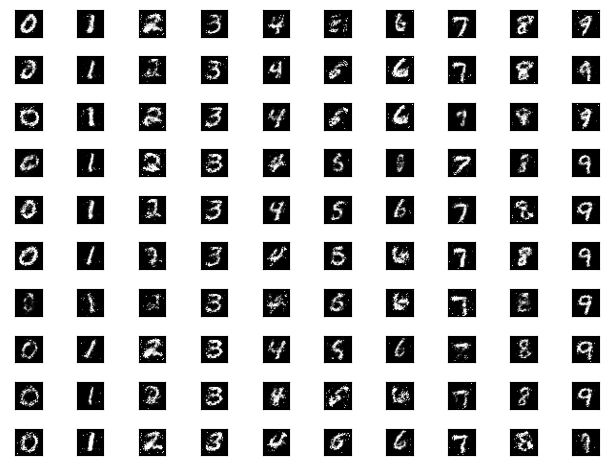

epoch = 35/50, d_loss=0.555, g_loss=0.917                                                                                                                        


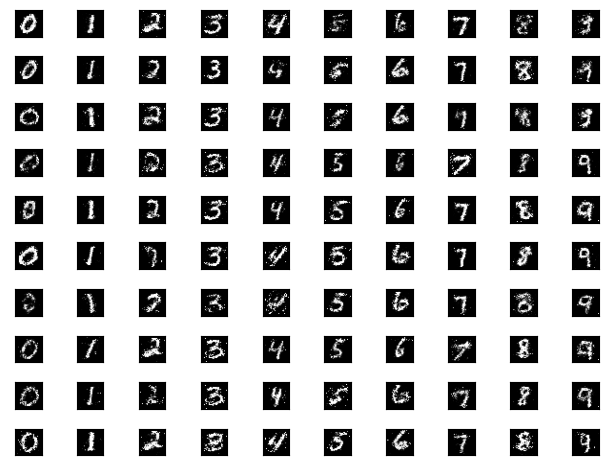

epoch = 36/50, d_loss=0.732, g_loss=0.775                                                                                                                        


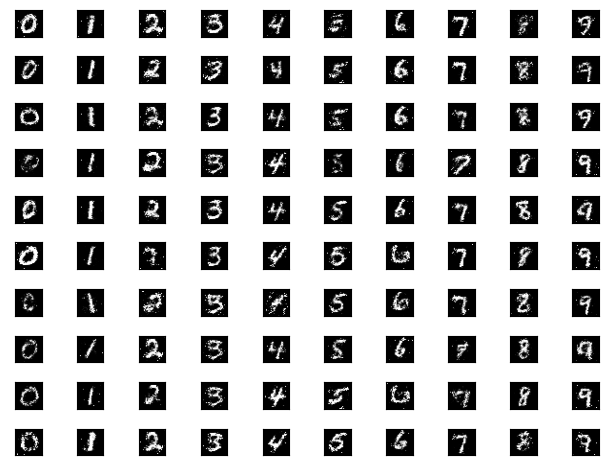

epoch = 37/50, d_loss=0.644, g_loss=0.873                                                                                                                        


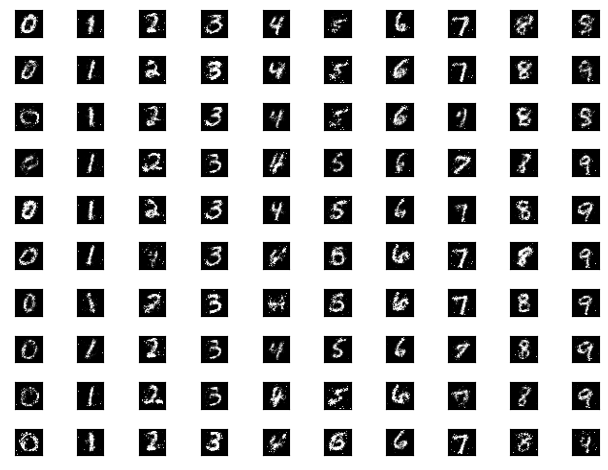

epoch = 38/50, d_loss=0.655, g_loss=0.823                                                                                                                        


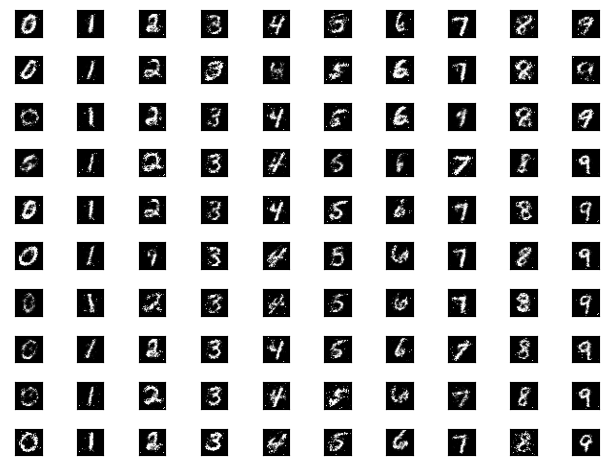

epoch = 39/50, d_loss=0.647, g_loss=0.888                                                                                                                        


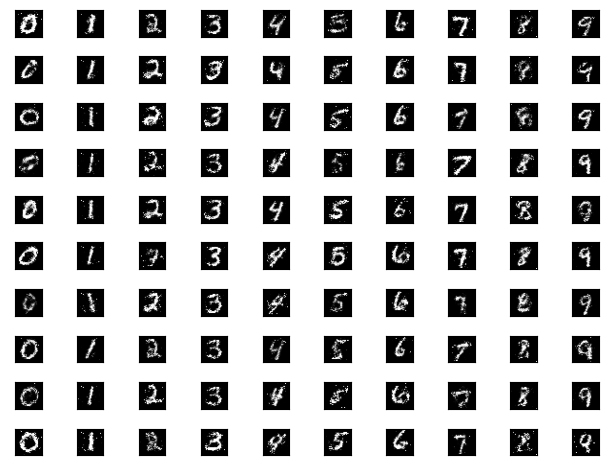

epoch = 40/50, d_loss=0.653, g_loss=0.896                                                                                                                        


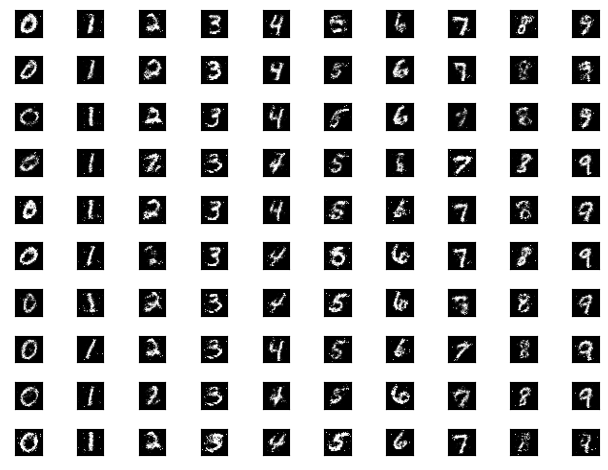

epoch = 41/50, d_loss=0.584, g_loss=0.887                                                                                                                        


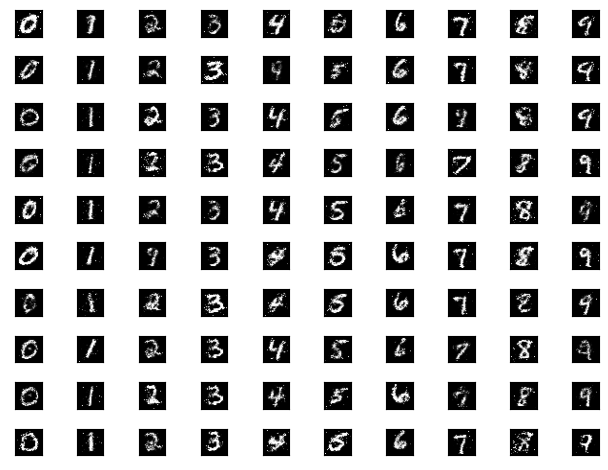

epoch = 42/50, d_loss=0.655, g_loss=0.825                                                                                                                        


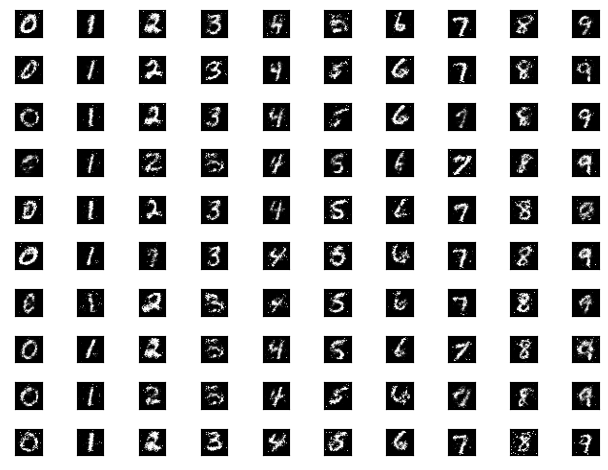

epoch = 43/50, d_loss=0.564, g_loss=0.832                                                                                                                        


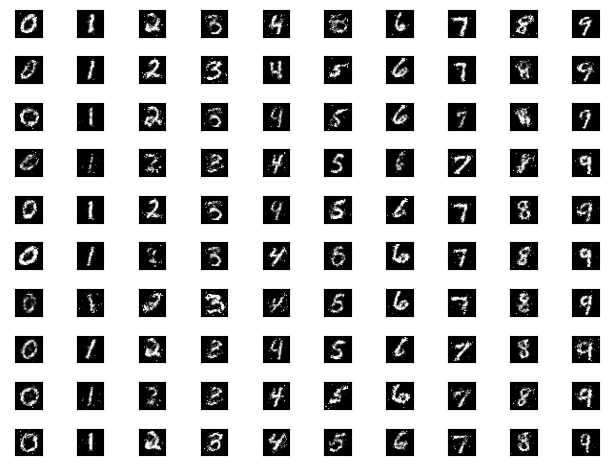

epoch = 44/50, d_loss=0.639, g_loss=0.849                                                                                                                        


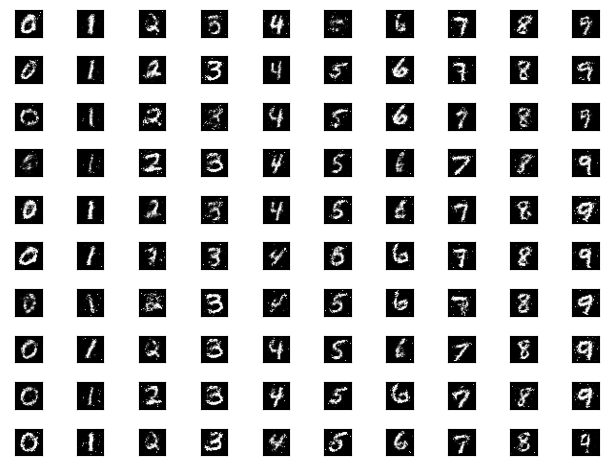

epoch = 45/50, d_loss=0.594, g_loss=0.822                                                                                                                        


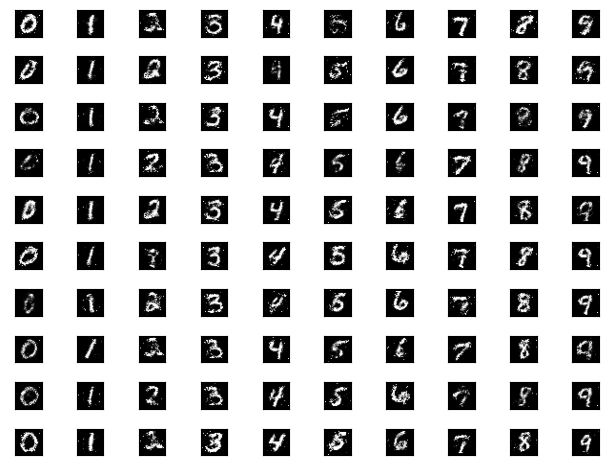

epoch = 46/50, d_loss=0.588, g_loss=0.981                                                                                                                        


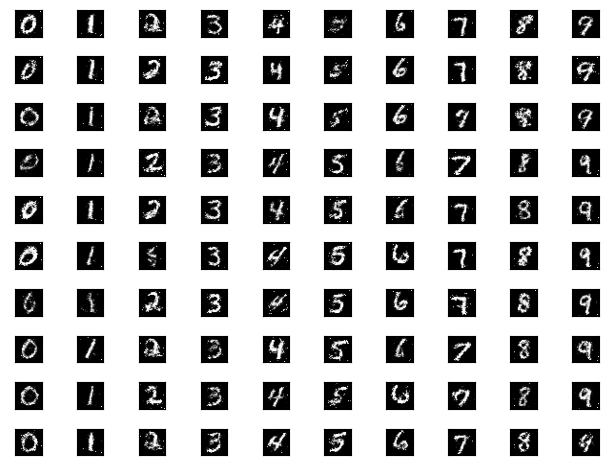

epoch = 47/50, d_loss=0.606, g_loss=1.036                                                                                                                        


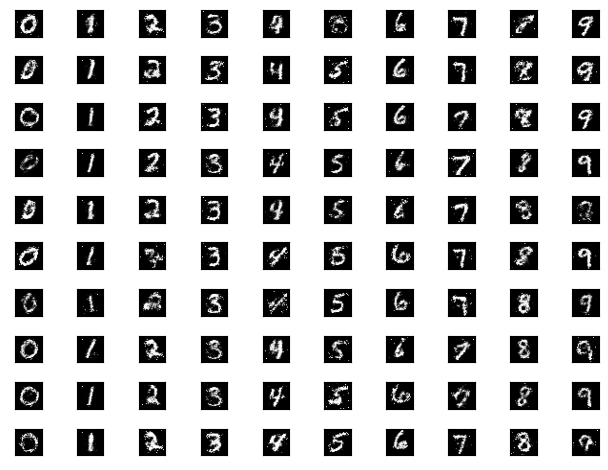

epoch = 48/50, d_loss=0.692, g_loss=0.869                                                                                                                        


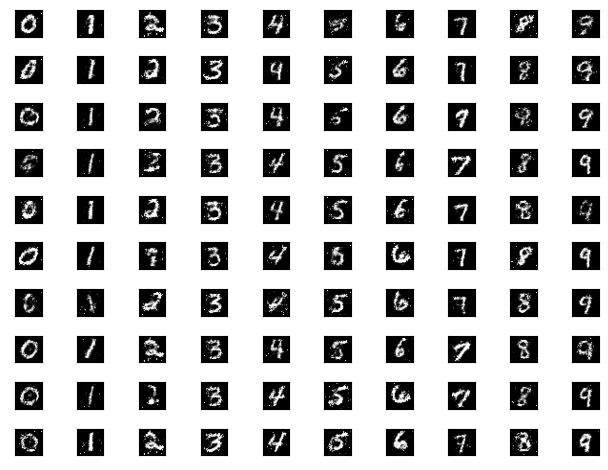

epoch = 49/50, d_loss=0.666, g_loss=0.894                                                                                                                        


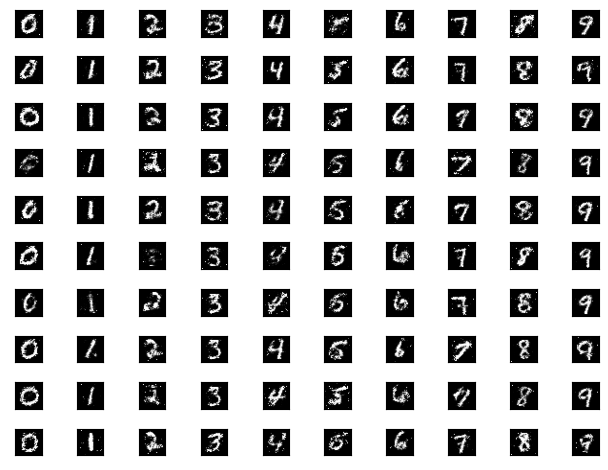

epoch = 50/50, d_loss=0.632, g_loss=0.918                                                                                                                        


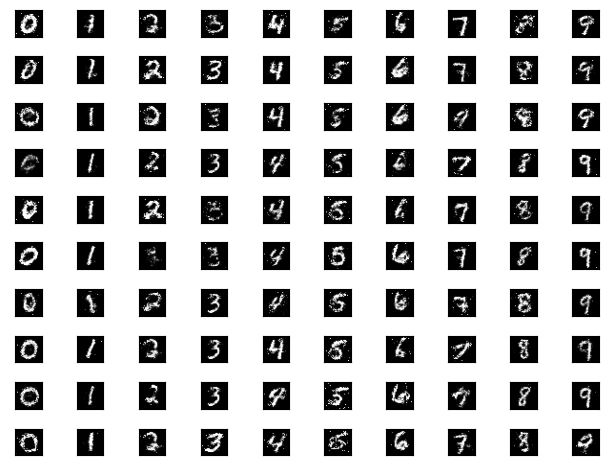

In [47]:
epochs = 50
batch_size = 32
smooth = 0.05

real = np.ones(shape=(batch_size, 1))
fake = np.zeros(shape=(batch_size, 1))

d_loss = []
d_g_loss = []

#plot details
samples = 100
noise = np.random.normal(loc=0, scale=1, size=(samples, latent_dim))
labels = np.arange(0, 100).reshape(-1, 1)
labels = labels % 10


for e in range(epochs):
    for i in range(len(X_train) // batch_size):

        # Train Discriminator weights
        discriminator.trainable = True

        # Real samples
        X_batch = X_train[i*batch_size:(i+1)*batch_size]
        real_labels = y_train[i*batch_size:(i+1)*batch_size].reshape(-1, 1)

        d_loss_real = discriminator.train_on_batch(x=[X_batch, real_labels], y=real * (1 - smooth))

        # Fake Samples
        z = np.random.normal(loc=0, scale=1, size=(batch_size, latent_dim))
        random_labels = np.random.randint(0, 10, batch_size).reshape(-1, 1)
        X_fake = generator.predict_on_batch([z, random_labels])

        d_loss_fake = discriminator.train_on_batch(x=[X_fake, random_labels], y=fake)

        # Discriminator loss
        d_loss_batch = 0.5 * (d_loss_real[0] + d_loss_fake[0])

        # Train Generator weights
        discriminator.trainable = False

        z = np.random.normal(loc=0, scale=1, size=(batch_size, latent_dim))
        random_labels = np.random.randint(0, 10, batch_size).reshape(-1, 1)
        d_g_loss_batch = d_g.train_on_batch(x=[z, random_labels], y=real)

        print(
            'epoch = %d/%d, batch = %d/%d, d_loss=%.3f, g_loss=%.3f' % (e + 1, epochs, i, len(X_train) // batch_size, d_loss_batch, d_g_loss_batch[0]),
            100*' ',
            end='\r'
        )

    d_loss.append(d_loss_batch)
    d_g_loss.append(d_g_loss_batch[0])
    print('epoch = %d/%d, d_loss=%.3f, g_loss=%.3f' % (e + 1, epochs, d_loss[-1], d_g_loss[-1]), 100*' ')


    # plotting part
    # noise matrix is consistent in all iterations
    x_fake = generator.predict([noise, labels])
    for k in range(samples):
        plt.subplot(10, 10, k+1)
        plt.imshow(x_fake[k].reshape(28, 28), cmap='gray')
        plt.xticks([])
        plt.yticks([])


    plt.tight_layout()
    plt.savefig(f'./images5/eoch_{e+1}.jpeg')
    plt.show()

# plots

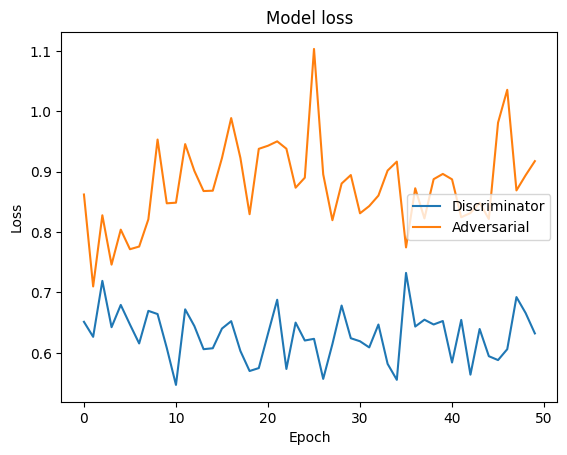

In [48]:
# plotting the metrics
plt.plot(d_loss)
plt.plot(d_g_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Discriminator', 'Adversarial'], loc='center right')
plt.show()

In [2]:
import imageio
import os

def create_gif(folder, gif_name):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith('.jpeg') or filename.endswith('.png'):
            file_path = os.path.join(folder, filename)
            images.append(imageio.imread(file_path))
    imageio.mimsave(gif_name, images, fps=10)

create_gif("./images5", "weak.gif")

C:\Users\KASHANI\AppData\Local\Temp\ipykernel_14296\3772539095.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))
